# Project Milestone 1

In [2]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.tsa.stattools as smtsa
from IPython.display import display
import statsmodels.api as sm
from scipy import stats
# from empiricaldist import Pmf
# from empiricaldist import Cdf

import random
from scipy.stats import ttest_ind

In [4]:
# Read alzheimers data into a Pandas DataFrame.
alz_df = pd.read_csv('./dataset/alzheimers_disease_data.csv')

display(alz_df.head())

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [5]:
# check the shape and information on the df
print(alz_df.shape)
print(alz_df.columns)

(2149, 35)
Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')


In [6]:
# Drop unnecessary variable
alz_df = alz_df.drop(columns=['PatientID'])

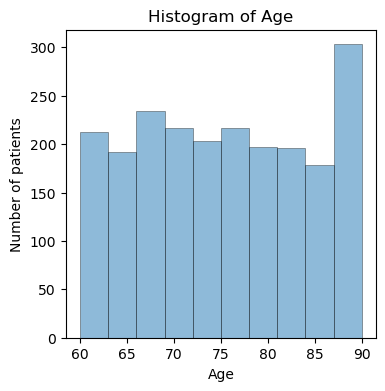

In [7]:
# create a histogram for Age
plt.figure(figsize = (4,4))
plt.hist(alz_df['Age'], 
         alpha=0.5,  
         linewidth = 0.5,
         edgecolor="black")
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Histogram of Age');
plt.show()

In [8]:
# Create a mapping dictionary
sex_dict ={
        0: 'Male',
        1: 'Female',
}
# Replace encoded values with original labels
sex = alz_df["Gender"].map(sex_dict)

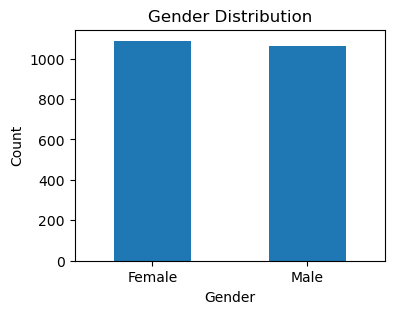

In [9]:
# Count the occurrences of each gender
gender_counts = sex.value_counts()

# Create the bar chart
plt.figure(figsize=(4, 3))
gender_counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

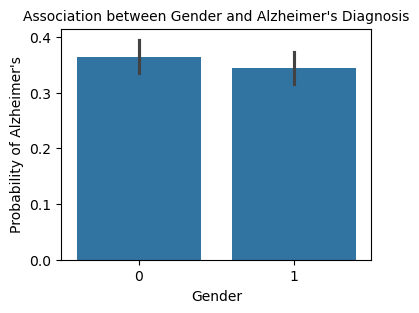

In [10]:
# Create a bar plot to show Association between Memory Complaints and Alzheimer\'s Diagnosis
plt.figure(figsize=(4, 3))
sns.barplot(x=alz_df['Gender'], y=alz_df['Diagnosis'], data=alz_df)
plt.title('Association between Gender and Alzheimer\'s Diagnosis', fontsize=10)
plt.xlabel('Gender')
plt.ylabel('Probability of Alzheimer\'s')
plt.show()

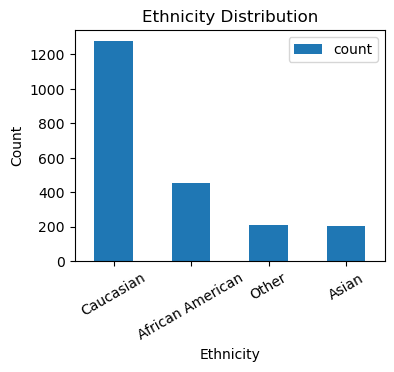

In [11]:
# Create a mapping dictionary
race_dict ={
            0: 'Caucasian',
            1: 'African American',
            2: 'Asian',
            3: 'Other'
}
# Replace encoded values with original labels
race = alz_df["Ethnicity"].map(race_dict)

# Count the occurrences of each race
race_counts = race.value_counts()

# Create the bar chart
plt.figure(figsize=(4, 3))
race_counts.plot(kind='bar')
#plt.bar(alz_df['Ethnicity'], race_counts, capsize = 3, color ="Red")
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend()
plt.show()

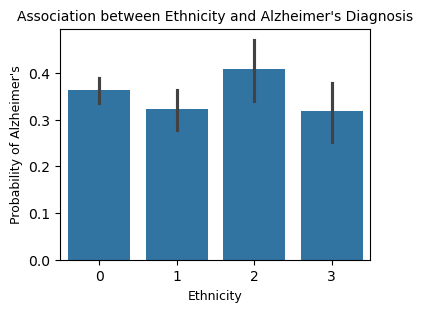

In [12]:
# Create a bar plot to show Association between Ethnicity and Alzheimer\'s Diagnosis'
plt.figure(figsize=(4, 3))
sns.barplot(x='Ethnicity', y='Diagnosis', data=alz_df,errorbar=('ci', 95),)
plt.title('Association between Ethnicity and Alzheimer\'s Diagnosis', fontsize=10)
plt.xlabel('Ethnicity',fontsize=9)
plt.ylabel('Probability of Alzheimer\'s',fontsize=9)
plt.show()

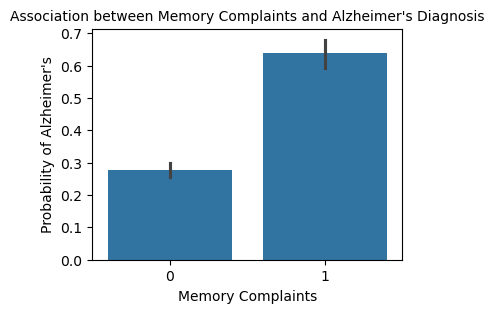

In [13]:
# Create a bar plot to show Association between Memory Complaints and Alzheimer\'s Diagnosis
plt.figure(figsize=(4, 3))
sns.barplot(x=alz_df['MemoryComplaints'], y=alz_df['Diagnosis'], data=alz_df)
plt.title('Association between Memory Complaints and Alzheimer\'s Diagnosis', fontsize=10)
plt.xlabel('Memory Complaints')
plt.ylabel('Probability of Alzheimer\'s')
plt.show()

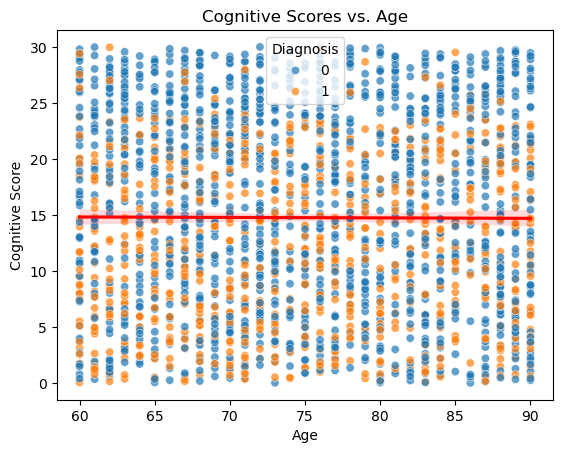

In [14]:
import seaborn as sns
import pandas as pd

# Create the scatter plot to show relationship b/n Cognitive Scores vs. Age
sns.scatterplot(x='Age', y='MMSE', data=alz_df, hue='Diagnosis', alpha=0.7)
sns.regplot(x='Age', y='MMSE', data=alz_df, scatter=False, color='red')
plt.title('Cognitive Scores vs. Age')
plt.xlabel('Age')
plt.ylabel('Cognitive Score')
plt.show()

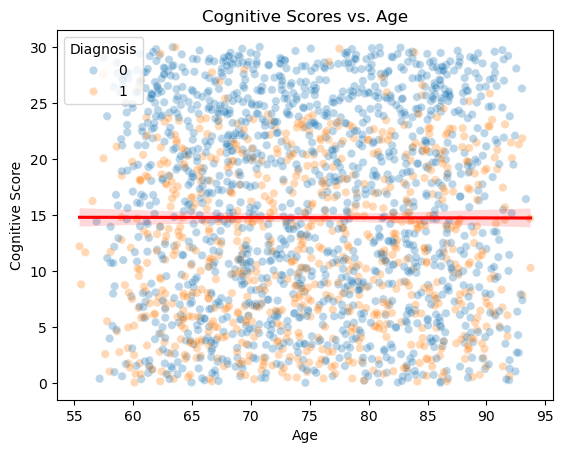

In [15]:
# break up the columns by adding random noise to the values
age = alz_df['Age']
# generate noise from a normal distribution with mean 0 and standard deviation 2
noise = np.random.normal(0, 2, size=len(alz_df))
age_jitter = age + noise

# Create the scatter plot with enhancements
sns.scatterplot(x=age_jitter, y='MMSE', data=alz_df, hue='Diagnosis', alpha=0.3)
sns.regplot(x=age_jitter, y='MMSE', data=alz_df, scatter=False, color='red')
plt.title('Cognitive Scores vs. Age')
plt.xlabel('Age')
plt.ylabel('Cognitive Score')
plt.show()

In [16]:
# Select variables for descriptive stat analysis
selected_df = alz_df.loc[:, ['Age',"BMI", "SystolicBP", "DiastolicBP","CholesterolTotal",
                                     "CholesterolLDL","CholesterolHDL", "CholesterolTriglycerides","Diagnosis"]]
selected_df.head()

,Age,BMI,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,Diagnosis
0,73,22.927749,142,72,242.366840,56.150897,33.682563,162.189143,0
1,89,26.827681,115,64,231.162595,193.407996,79.028477,294.630909,0
2,73,17.795882,99,116,284.181858,153.322762,69.772292,83.638324,0
3,74,33.800817,118,115,159.582240,65.366637,68.457491,277.577358,0
4,89,20.716974,94,117,237.602184,92.869700,56.874305,291.198780,0


In [17]:
# select patients with positive and negative diagnosis result
positive_dx = selected_df[selected_df.Diagnosis == 1]
negative_dx = selected_df[selected_df.Diagnosis == 0]

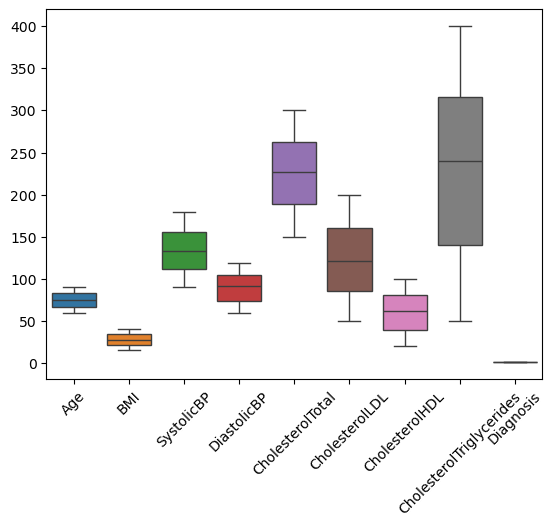

In [18]:
# Create a grid of boxplots
sns.boxplot(data=positive_dx)
plt.xticks(rotation=45)
plt.show()

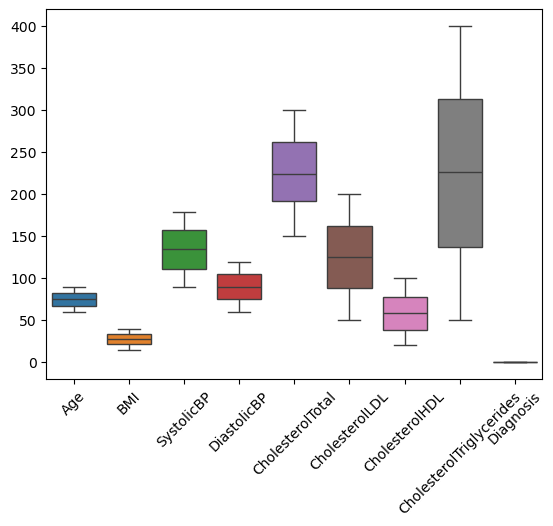

In [19]:
sns.boxplot(data=negative_dx)
plt.xticks(rotation=45)
plt.show()

In [20]:
# Display a statistical overview for positive dx df
positive_dx.describe(include="all")

,Age,BMI,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,Diagnosis
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.0
mean,74.842105,27.912670,133.717105,89.973684,225.565197,122.461726,60.795330,231.406671,1.0
std,9.149977,7.298765,25.962885,17.458231,43.192207,43.231730,23.236805,102.115973,0.0
min,60.000000,15.018240,90.000000,60.000000,150.212650,50.430083,20.015125,50.461611,1.0
25%,67.000000,21.684882,112.000000,74.000000,188.747243,85.195865,39.687037,140.034382,1.0
50%,75.000000,28.004793,133.000000,91.000000,226.448082,121.803389,61.847228,239.618889,1.0
75%,83.000000,34.449386,156.000000,105.000000,262.805195,160.046948,80.565846,316.131860,1.0
max,90.000000,39.992767,179.000000,119.000000,299.959991,199.965665,99.959494,399.854322,1.0


In [21]:
# Display a statistical overview for negative dx df
negative_dx.describe(include="all")

,Age,BMI,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,Diagnosis
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.0
mean,74.945284,27.515092,134.564435,89.778978,224.996342,125.361434,58.734832,226.571537,0.0
std,8.904709,7.171293,25.946402,17.671415,42.196668,43.421489,23.061410,101.912145,0.0
min,60.000000,15.008851,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.0
25%,67.000000,21.538994,111.000000,75.000000,191.512224,87.947655,38.675117,137.172234,0.0
50%,75.000000,27.560758,135.000000,90.000000,224.453889,124.839495,58.299539,226.136002,0.0
75%,83.000000,33.590817,157.000000,105.000000,261.873127,162.663527,77.917938,313.244803,0.0
max,90.000000,39.988513,179.000000,119.000000,299.993352,199.807179,99.980324,399.941862,0.0


## Result Summary

In this graphical analysis, we can see Women are more likely to develop Alzheimer's disease than men. This gender disparity is a well-established fact and reported on different articles. With regrad to ethinicity, we can clearly see racial and ethnic disparities exist in Alzheimer's disease. African Americans, Asians and others are at a higher risk of developing Alzheimer's disease compared to Caucasians. In this analysis, we can also deduce the risk of Alzheimer's increases with age. One final point to mention, as we can see it on cognitive score vs age scatterplot, a decline in cognitive function, as measured by MMSE, is a strong indicator of AD.

# ============================================================

# Project Milestone 2

## =========================================================================

### Instruction:

Term Project Milestone 2: Data Preparation. Here is a list of steps to consider performing in Milestone 2:

* Drop any features that are not useful for your model building and explain why they are not useful.
* Perform any data extraction/selection steps.
* Transform features if necessary.
* Engineer new useful features.
* Deal with missing data (do not just drop rows or columns without justifying this).
* Create dummy variables if necessary.

In [1]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.tsa.stattools as smtsa
from IPython.display import display
import statsmodels.api as sm
from scipy import stats
# from empiricaldist import Pmf
# from empiricaldist import Cdf

import random
from scipy.stats import ttest_ind

In [2]:
# Read alzheimers data into a Pandas DataFrame.
alz_df = pd.read_csv('./dataset/alzheimers_disease_data.csv')

# Check the first few rows of the dataset
display(alz_df.head())

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


**Drop irrelevant features and explain why they are not useful.**

In [3]:
# Drop unnecessary variable
alz_df = alz_df.drop(columns=['PatientID', 'DoctorInCharge'])

**Explanation**

* No Predictive Power: Since each Patient ID is distinct, it does not contribute to any patterns or trends in the data that could help in predicting outcomes. Including it in a model could lead to overfitting, where the model learns to recognize the ID rather than the underlying relationships in the data.
* While the doctor's name is a categorical variable, it does not provide predictive value related to the patient’s cognitive status or treatment outcomes. Each doctor may have different styles, but this does not necessarily correlate with patient outcomes.

In [4]:
# check the data types
alz_df.dtypes

Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
ADL                          float64
C

In [5]:
# Check missing values
alz_df.isna().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [6]:
# Transform Features-Normalize Age
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
alz_df['Age_Normalized'] = scaler.fit_transform(alz_df[['Age']])

# Check if any other feature needs scaling or transformation
alz_df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Age_Normalized
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,0,0,1.725883,0,0,0,1,0,0,0.433333
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,0,0,2.592424,0,0,0,0,1,0,0.966667
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,0,0,7.119548,0,1,0,1,0,0,0.433333
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,0,1,6.481226,0,0,0,0,0,0,0.466667
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,0,0,0.014691,0,0,1,1,0,0,0.966667


**Identify outliers and treat them using Capping the Outliers (Winsorization) method**

In [7]:
# Create one feature
feature = alz_df.drop(columns=["Diagnosis"])

# Create a function to return index of outliers
def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound)) # returns the indices of these outliers in the array x
    
# Run function
indicies_of_outliers(feature)

(array([   0,    0,    0, ..., 2148, 2148, 2148], dtype=int64),
 array([ 0, 16, 17, ..., 19, 20, 21], dtype=int64))

In [8]:
# Calculate the IQR and bounds again
q1, q3 = np.percentile(feature, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)

# Cap the outliers
feature = np.where(feature < lower_bound, lower_bound, feature)
feature = np.where(feature > upper_bound, upper_bound, feature)

**Discretizate features and Engineer new useful features.**

In [9]:
# Create an age category feature
alz_df['Age_Category'] = pd.cut(alz_df['Age'], bins=[0, 60, 75, 90, 110], labels=['<60', '60-75', '75-90', '>90'])

# Engineer a composite score based on Functional Assessment and Cognitive tests
alz_df['CognitiveFunctionalScore'] = (
    alz_df['MMSE'] + (10 - alz_df['FunctionalAssessment'])
)

alz_df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Age_Normalized,Age_Category,CognitiveFunctionalScore
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,1.725883,0,0,0,1,0,0,0.433333,60-75,24.944655
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,2.592424,0,0,0,0,1,0,0.966667,75-90,23.494572
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,7.119548,0,1,0,1,0,0,0.433333,60-75,11.461171
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,6.481226,0,0,0,0,0,0,0.466667,60-75,15.026021
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,0.014691,0,0,1,1,0,0,0.966667,75-90,17.472570


**Create dummy variables**

In [10]:
# Create dummy variables for Gender, Ethnicity and Education level
alz_df = pd.get_dummies(alz_df, columns=['Gender', 'Ethnicity', 'EducationLevel'], drop_first=True, dtype=int)

# Create'Age_Category' feature and  get dummies for that
alz_df = pd.get_dummies(alz_df, columns=['Age_Category'], drop_first=True, dtype=int)

In [11]:
alz_df.columns

Index(['Age', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
       'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers',
       'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury',
       'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL',
       'Confusion', 'Disorientation', 'PersonalityChanges',
       'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis',
       'Age_Normalized', 'CognitiveFunctionalScore', 'Gender_1', 'Ethnicity_1',
       'Ethnicity_2', 'Ethnicity_3', 'EducationLevel_1', 'EducationLevel_2',
       'EducationLevel_3', 'Age_Category_60-75', 'Age_Category_75-90',
       'Age_Category_>90'],
      dtype='object')

In [12]:
alz_df.shape

(2149, 42)

In [13]:
# Select features categories 
clinical_features = alz_df[['SystolicBP', 'DiastolicBP', 'CholesterolTotal',
                            'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']]
lifeStyle_features = alz_df[['BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
                             'DietQuality', 'SleepQuality']]
med_history_features = alz_df[['FamilyHistoryAlzheimers','CardiovascularDisease', 
                               'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']]
cognitive_fun_features = alz_df[['MMSE','FunctionalAssessment', 'MemoryComplaints', 
                                 'BehavioralProblems', 'ADL']]

In [14]:
# Transform Features-Normalize clinical features
from sklearn.preprocessing import MinMaxScaler

# Standardize features
min_max_scaler = MinMaxScaler()
scaled_features = min_max_scaler.fit_transform(clinical_features)

# Create a dataframe using the scaled data
scaled_clinical_df = pd.DataFrame(scaled_features, columns= ['SystolicBP_scaled', 'DiastolicBP_scaled', 'CholesterolTotal_scaled',
                            'CholesterolLDL_scaled', 'CholesterolHDL_scaled', 'CholesterolTriglycerides_scaled'])
scaled_clinical_df.head()

,SystolicBP_scaled,DiastolicBP_scaled,CholesterolTotal_scaled,CholesterolLDL_scaled,CholesterolHDL_scaled,CholesterolTriglycerides_scaled
0,0.584270,0.203390,0.615567,0.039538,0.171039,0.319802
1,0.280899,0.067797,0.540822,0.956205,0.738026,0.698711
2,0.101124,0.949153,0.894520,0.688497,0.622290,0.095072
3,0.314607,0.932203,0.063302,0.101085,0.605851,0.649922
4,0.044944,0.966102,0.583781,0.284763,0.461019,0.688892


In [15]:
# Joining the original and subset dataframes 
cleaned_alz_df = pd.concat([alz_df, scaled_clinical_df], axis=1)

In [16]:
# Check the final DataFrame after transformations
cleaned_alz_df.head()

,Age,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,...,EducationLevel_3,Age_Category_60-75,Age_Category_75-90,Age_Category_>90,SystolicBP_scaled,DiastolicBP_scaled,CholesterolTotal_scaled,CholesterolLDL_scaled,CholesterolHDL_scaled,CholesterolTriglycerides_scaled
0,73,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,...,0,1,0,0,0.584270,0.203390,0.615567,0.039538,0.171039,0.319802
1,89,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,...,0,0,1,0,0.280899,0.067797,0.540822,0.956205,0.738026,0.698711
2,73,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,...,0,1,0,0,0.101124,0.949153,0.894520,0.688497,0.622290,0.095072
3,74,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,...,0,1,0,0,0.314607,0.932203,0.063302,0.101085,0.605851,0.649922
4,89,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,...,0,0,1,0,0.044944,0.966102,0.583781,0.284763,0.461019,0.688892


In [17]:
cleaned_alz_df.columns

Index(['Age', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
       'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers',
       'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury',
       'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL',
       'Confusion', 'Disorientation', 'PersonalityChanges',
       'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis',
       'Age_Normalized', 'CognitiveFunctionalScore', 'Gender_1', 'Ethnicity_1',
       'Ethnicity_2', 'Ethnicity_3', 'EducationLevel_1', 'EducationLevel_2',
       'EducationLevel_3', 'Age_Category_60-75', 'Age_Category_75-90',
       'Age_Category_>90', 'SystolicBP_scaled', 'DiastolicBP_scaled',
       'CholesterolTotal_scaled', 'CholesterolLDL_scaled',
       'CholesterolHDL_scaled', 'CholesterolTriglycerides_scaled'],
      d

In [19]:
# List of columns to drop
columns_to_drop = ['Age', 'SystolicBP_scaled', 'DiastolicBP_scaled', 'CholesterolTotal_scaled',
                            'CholesterolLDL_scaled', 'CholesterolHDL_scaled', 'CholesterolTriglycerides_scaled']

# Drop the columns
cleaned_alz_df = cleaned_alz_df.drop(columns=columns_to_drop)

# check the shape of the dataset
cleaned_alz_df.shape

(2149, 41)

In [20]:
# Split the data into a training and test set, where the SalePrice column is the target.
from sklearn.model_selection import train_test_split

# Create feature and target coulmn
X = cleaned_alz_df.drop('Diagnosis', axis=1)
y = cleaned_alz_df['Diagnosis']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1504, 40)
X_test shape: (645, 40)


In [18]:
# Fit and transform the training features with a PCA so that 95% of the variance is retained.
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the feature matrix
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [19]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Apply absolute value to all features to remove Negative values in the X_train
X_train_scaled = np.abs(X_train_scaled)  

# Chi-square test for feature selection
chi_scores = chi2(X_train_scaled, y_train)

# Apply Chi-Square feature selection--Select the best 10 features
chi_selector = SelectKBest(chi2, k=10)
X_train_selected = chi_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = chi_selector.transform(X_test_scaled)

In [20]:
# How many features are in the PCA-transformed matrix?
print("Original number of features:", X_train.shape[1])
print("Reduced number of features:", X_train_selected.shape[1])

Original number of features: 47
Reduced number of features: 10


## =========================================================================

## Dataset Information

**Data Source**
* Kaggle: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data
  
#### Variable Description
1. Patient Information
     * PatientID: A unique identifier assigned to each patient (4751 to 6900).
2. Demographic Details
    * Age: The age of the patients ranges from 60 to 90 years.
    * Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
    * Ethnicity: The ethnicity of the patients, coded as follows:
        * 0: Caucasian
        * 1: African American
        * 2: Asian
        * 3: Other
    * EducationLevel: The education level of the patients, coded as follows:
        * 0: None
        * 1: High School
        * 2: Bachelor's
        * 3: Higher
3. Lifestyle Factors
    * BMI: Body Mass Index of the patients, ranging from 15 to 40.
    * Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
    * AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
    * PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
    * DietQuality: Diet quality score, ranging from 0 to 10.
    * SleepQuality: Sleep quality score, ranging from 4 to 10.
4. Medical History
    * FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
    * CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.
    * Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
    * Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.
    * HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.
    * Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.
5. Clinical Measurements
    * SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
    * DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
    * CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
    * CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
    * CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
    * CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.
6. Cognitive and Functional Assessments
    * MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
    * FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
    * MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.
    * BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
    * ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.
7. Symptoms
    * Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.
    * Disorientation: Presence of disorientation, where 0 indicates No and 1 indicates Yes.
    * PersonalityChanges: Presence of personality changes, where 0 indicates No and 1 indicates Yes.
    * DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.
    * Forgetfulness: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.
8. Diagnosis Information
    * Diagnosis: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

# Project Milestone 3

## =========================================================================

##  10.2 Term Project Milestone 3: Model Building and Evaluation

*  Student Name: Abraham Abate
*  Instructor: Brett Werner
*  DSC550: Data Mining
*  Data Science Dept., BU
*  Date: 11/02/2024

## =========================================================================

In Milestone 3: 
* you will begin the process of selecting, building, and evaluating a model.
* You are required to train and evaluate at least one model in this milestone.
* Write step-by-step for performing each of these steps. You can use any methods/tools you think are most appropriate, but you should explain/justify why you are selecting the model(s) and evaluation metric(s) you choose. It is important to think about what type of model and metric makes sense for your problem.
Again, do what makes the most sense for your project. Write a short overview/conclusion of the insights gained from your model building/evaluation.

### Workflow

This project aims to address a classification problem using supervised classification models for analysis. Here is the workflow to be followed in this and the final milestones:
1. Start with `Logistic Regression`, `SVM` and `Random Forest` as a baseline.
2. Utilize `cross-validation` and various metrics to evaluate the classification models.
3. On the final Milestoone: I will compare the result with Ensemble methods like `Bootstrap Aggregating`, `Adaptive Boosting` and `Gradient Boosting`methods like `XGBoost` for higher accuracy.
4. On the final Milestoone, I will also try to find the optimal hyperparameter values for the selected models. I will use `GridSearch` hyperparameter tuning methods.
5. I will also perform `feature importance analysis` to vizualize which feature contribute more for the model prediction.


### 1. Logistic Regression

In [21]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1504, 40)
X_test shape: (645, 40)


In [23]:
# Check if there is class imbalance
print(y.value_counts(normalize=True))

Diagnosis
0    0.646347
1    0.353653
Name: proportion, dtype: float64


In [24]:
# Remove constant features
variance_threshold = VarianceThreshold()
X_non_constant = variance_threshold.fit_transform(X)

#  Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_non_constant)

# Select the 10 best features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

In [25]:
# Split the data into training and testing sets
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Display the shapes of the training/testing sets
print("X_train shape:", X_train_set.shape)
print("X_test shape:", X_test_set.shape)

X_train shape: (1504, 10)
X_test shape: (645, 10)


In [26]:
# Train Logistic Regression model
logit_model = LogisticRegression(class_weight='balanced')
logit_model.fit(X_train_set, y_train_set)

# Set up k-fold cross-validation
k = 5 
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Run cross-validation and evaluate with AUC
cv_scores = cross_val_score(logit_model, X_selected, y, cv=cv, scoring="accuracy")

# Print each fold's AUC and the mean AUC
print(f"Accuracy scores for each fold: {cv_scores}")
print(f"Mean Accuracy across {k} folds: {cv_scores.mean():.3f}")
print(f"Standard deviation of Accuracy across {k} folds: {cv_scores.std():.3f}")

Accuracy scores for each fold: [0.81627907 0.85348837 0.81627907 0.80232558 0.82750583]
Mean Accuracy across 5 folds: 0.823
Standard deviation of Accuracy across 5 folds: 0.017


In [27]:
# Make predictions
y_pred = logit_model.predict(X_test_set)
y_proba = logit_model.predict_proba(X_test_set)[:, 1]

# Evaluate the model- ROC
ROC_AUC_score = roc_auc_score(y_test_set, y_proba)
print(f'ROC AUC: {ROC_AUC_score:.2f}')

# Calculate accuracy
accuracy = accuracy_score(y_test_set, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print("Classification Report:")
print(classification_report(y_test_set, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_set, y_pred)
print("Confusion Matrix:")

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

ROC AUC: 0.89
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       401
           1       0.74      0.79      0.76       244

    accuracy                           0.81       645
   macro avg       0.80      0.81      0.80       645
weighted avg       0.82      0.81      0.81       645

Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,332,69
Actual 1,52,192


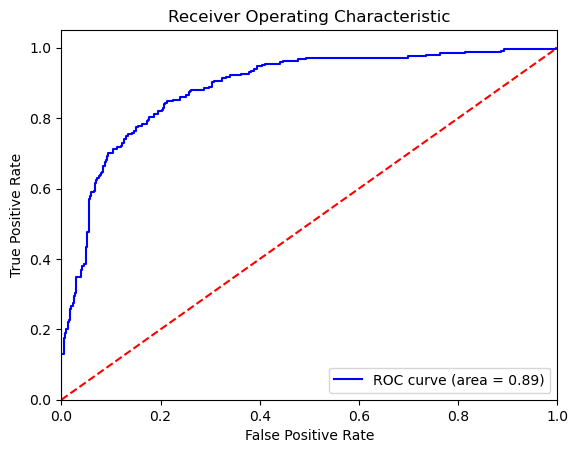

In [28]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_set, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Logistic Regression Result Summary

The cross-validation results show that logistic regression model is performing consistently with reasonably high accuracy:

- Mean Accuracy: The mean accuracy of 0.826 (or 82.6%) suggests that the model is generally effective, classifying about 82.6% of instances correctly on average.  
- Standard Deviation: The standard deviation of 0.011*(or 1.1%) is quite low, indicating minimal variability in accuracy across the folds. This consistency suggests the model is stable and likely generalizes well across different data subsets.

Interpretation:
- Consistent Performance: The model’s accuracy is stable across different folds, with a small spread around the mean accuracy. This indicates the model is not overly sensitive to variations in the data splits.
- Good Baseline: While an accuracy of 82.6% is solid, there may be room for further refinement to improve the performance of the model.

Classification model performance metrics suggest that the model performing reasonably well but may still have some areas for improvement, especially in classifying the minority class (`1`, Alzheimer's). The result interpretations shown below:

1. ROC AUC: 0.89
   - The ROC AUC score of 0.89 indicates that the model has a good ability to distinguish between the two classes. A value close to 1 suggests strong classification capability, which is promising.
2. Overall Accuracy: 0.81
   - An accuracy of 81% means the model is correctly classifying 81% of all cases. While this is decent, it is lower than the ROC AUC, which suggests that the accuracy metric might not fully capture the model’s discriminatory power. This is often seen when class distribution or thresholding affects class prediction.
3. Classification Report Analysis
   - Precision: Measures the accuracy of positive predictions.
     - Class 0 (Non-Alzheimer’s): 0.86 — Of all instances predicted as `0`, 86% were correctly classified.
     - Class 1 (Alzheimer’s): 0.74 — For all predictions of `1`, 74% were correct.
   - Recall: Measures how well the model identifies all positive instances.
     - Class 0: 0.83 — The model correctly identified 83% of actual `0` cases.
     - Class 1: 0.79 — The model correctly identified 79% of actual `1` cases, which is slightly lower than the recall for `0`.
   - F1-Score: The harmonic mean of precision and recall, balancing the two.
     - Class 0: 0.85
     - Class 1: 0.76   
4. Confusion Matrix
   - True Negatives (333): Non-Alzheimer’s cases correctly predicted as `0`.
   - False Positives (68): Non-Alzheimer’s cases incorrectly predicted as `1`.
   - False Negatives (52): Alzheimer’s cases missed, predicted as `0`.
   - True Positives (192): Correct predictions for Alzheimer’s.

Interpretation:
- Good Discrimination (ROC AUC): The model’s high ROC AUC of 0.89 indicates good potential for distinguishing between Alzheimer’s and non-Alzheimer’s cases. However, the accuracy (0.81) and some lower metrics for class `1` suggest the threshold or class distribution might impact classification.
- Lower Recall for Class 1: Recall for Alzheimer’s cases (0.79) is decent but suggests that the model misses 21% of true Alzheimer’s cases, which could be a concern since identifying all positive cases is critical.

**Recommendations for Milestone -4:**
1. Adjust Classification Threshold: since it’s important to reduce false negatives (missed Alzheimer’s cases), I  need to adjust the threshold to be more sensitive to class `1`, trading some precision for better recall.
2. Class Imbalance Handling: since the data is moderately imbalanced, I will consider using  resampling techniques in addition to class weighting to improve the recall for class `1`.
3. Hyperparameter Tuning: Fine-tuning model parameters to help improve recall and precision for Alzheimer’s cases without sacrificing performance on non-Alzheimer’s cases.

Overall, the logisitic regression model performs well, with a good balance between classes. 

### 2. SVM

In [25]:
from sklearn.feature_selection import VarianceThreshold

# Remove constant features
variance_threshold = VarianceThreshold()
X_non_constant = variance_threshold.fit_transform(X)

# Standardizing the features
std_scaler = StandardScaler()
X_scaled_val = std_scaler.fit_transform(X_non_constant)

# Select the 10 best features using ANOVA F-test
anova_selector = SelectKBest(score_func=f_classif, k=10)
X_selected_set = anova_selector.fit_transform(X_scaled_val, y)

In [26]:
# Split the data into training and testing sets
X_training, X_testing, y_training, y_testing = train_test_split(X_selected_set, y, test_size=0.3, random_state=42)

# Train an SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42, class_weight='balanced')
svm_model.fit(X_training, y_training)

# Set up k-fold cross-validation
k = 5 
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Run cross-validation and evaluate with AUC
cv_scores = cross_val_score(svm_model, X_selected_set, y, cv=cv, scoring="accuracy")

# Print each fold's AUC and the mean AUC
print(f"Accuracy scores for each fold: {cv_scores}")
print(f"Mean Accuracy across {k} folds: {cv_scores.mean():.3f}")
print(f"Standard deviation of Accuracy across {k} folds: {cv_scores.std():.3f}")

Accuracy scores for each fold: [0.82093023 0.84651163 0.81627907 0.80465116 0.83682984]
Mean Accuracy across 5 folds: 0.825
Standard deviation of Accuracy across 5 folds: 0.015


In [27]:
# Predictions
y_prediction = svm_model.predict(X_testing)
y_probabilities = svm_model.predict_proba(X_testing)[:, 1]

# Evaluate the model- ROC
ROCAUC_score = roc_auc_score(y_testing, y_probabilities)
print(f'ROC AUC: {ROCAUC_score:.2f}')

# Calculate accuracy
accuracy = accuracy_score(y_testing, y_prediction)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print("Classification Report:")
print(classification_report(y_testing, y_prediction))

# Confusion Matrix
cm = confusion_matrix(y_testing, y_prediction)
print("Confusion Matrix:")

# Create a DataFrame from the confusion matrix.
conf_m_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

conf_m_df

ROC AUC: 0.89
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       401
           1       0.75      0.79      0.77       244

    accuracy                           0.82       645
   macro avg       0.81      0.81      0.81       645
weighted avg       0.82      0.82      0.82       645

Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,336,65
Actual 1,51,193


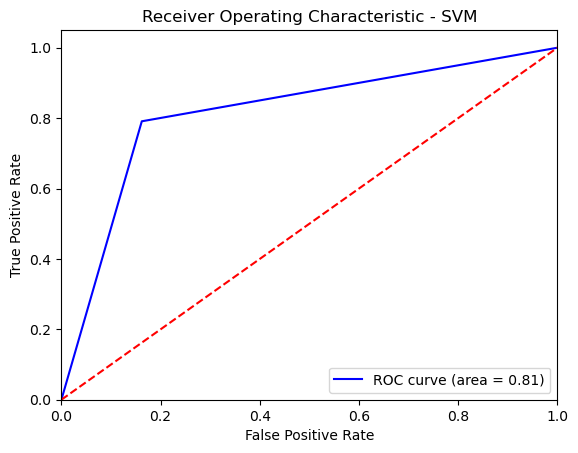

In [28]:
# Calculate ROC curve
fp_rate, tp_rate, thresholds = roc_curve(y_testing, y_prediction)
roc_auc_val = auc(fp_rate, tp_rate)

# Plot ROC curve
plt.figure()
plt.plot(fp_rate, tp_rate, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc='lower right')
plt.show()

### SVM Model Result Summary

Cross-validation results show a stable model performance with relatively high accuracy scores. Shown below the interpretation of cv result metrics:

- Accuracy Scores per Fold: Each fold produced accuracy scores around 0.80 to 0.85, indicating consistent performance across different data splits.  
- Mean Accuracy: The mean accuracy of 0.825 (or 82.5%) suggests that, on average, the model correctly classifies 82.5% of instances in each fold. 
- Standard Deviation of Accuracy: The standard deviation of 0.015 (or 1.5%) across the folds shows that accuracy is stable and doesn’t vary much across different data splits. This low variance implies that the model generalizes well and is not overly dependent on any particular subset of the data.

Interpretation:
- Model Stability: The low standard deviation in accuracy across folds indicates that the model's performance is stable. we might not need to worry about overfitting or high variance in predictions.
- Generalizability: Consistent performance across folds suggests that the model generalizes well to unseen data.

Explanation of each evaluation metric:

1. Overall Accuracy: 0.82
   - An accuracy of 82% indicates that the model correctly classifies 82% of all instances, which is consistent with the cross-validation mean accuracy. 
2. Classification Report
   - Precision: tells us the proportion of positive identifications that were actually correct.
     - Class `0` (Non-Alzheimer’s): 0.87
     - Class `1` (Alzheimer’s): 0.75
     - This indicates that the model has higher precision for class `0` (Non-Alzheimer’s) than for class `1`.
   - Recall: This is the proportion of actual positives that the model correctly identified.
     - Class `0`: 0.84
     - Class `1`: 0.79
     - The model has slightly better recall for class `1` (Alzheimer’s), meaning it correctly identifies 79% of actual positive cases.
   - F1-Score: The harmonic mean of precision and recall, which balances the above two.
     - Class `0`: 0.85
     - Class `1`: 0.77
     - The F1-score is higher for class `0`, but class `1` still has a fairly decent score.
3. Confusion Matrix
   - True Negatives (336): The model correctly predicted `0` for non-Alzheimer's.
   - False Positives (65): The model incorrectly predicted `1` (Alzheimer's) for non-Alzheimer cases.
   - False Negatives (51): The model missed 51 cases of actual Alzheimer's, predicting them as non-Alzheimer.
   - True Positives (193): The model correctly predicted `1` for Alzheimer's.

Interpretation:
- The precision and recall scores indicate that SVM model is performing reasonably well in distinguishing between classes.
- False Negatives (51) is a particular concern in a medical context, as failing to identify true Alzheimer's cases might lead to patients not receiving necessary attention.
- The confusion matrix shows that while the model is generally accurate, it has a tendency to predict `0` (non-Alzheimer) slightly more frequently, which might suggest a minor class imbalance effect.

The SVM model demonstrated slightly higher accuracy and precision than the logistic regression model, although both models showed similar overall performance.

### 3. Random Forest

In [29]:
# Remove constant features
variance_threshold = VarianceThreshold()
X_non_constant = variance_threshold.fit_transform(X)

# Standardize the features
stdscaler = StandardScaler()
X_scaled_feat = stdscaler.fit_transform(X_non_constant)

#  Select the 10 best features 
KB_selector = SelectKBest(score_func=f_classif, k=10)
X_selected_feat = KB_selector.fit_transform(X_scaled_feat, y)

In [30]:
# Split the data into training and testing sets
X_training_set, X_testing_set, y_training_set, y_testing_set = train_test_split(X_selected_feat, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_training_set, y_training_set)

# Set up k-fold cross-validation
k = 5 
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Run cross-validation and evaluate with AUC
cv_scores = cross_val_score(rf_model, X_selected_set, y, cv=cv, scoring="accuracy")

# Print each fold's AUC and the mean AUC
print(f"Accuracy scores for each fold: {cv_scores}")
print(f"Mean Accuracy across {k} folds: {cv_scores.mean():.3f}")
print(f"Standard deviation of Accuracy across {k} folds: {cv_scores.std():.3f}")

Accuracy scores for each fold: [0.95348837 0.93488372 0.94883721 0.96046512 0.95571096]
Mean Accuracy across 5 folds: 0.951
Standard deviation of Accuracy across 5 folds: 0.009


In [31]:
# Make predictions
y_preds = rf_model.predict(X_testing_set)
y_probs = rf_model.predict_proba(X_testing_set)[:, 1]

# Evaluate the model- ROC
rf_ROCAUC_score = roc_auc_score(y_testing_set, y_probs)
print(f'ROC AUC: {rf_ROCAUC_score:.2f}')

# Calculate accuracy
rf_accuracy = accuracy_score(y_testing_set, y_preds)
print(f'Accuracy: {rf_accuracy:.2f}')

# Display classification report
print("Classification Report:\n", classification_report(y_testing_set, y_preds))

# Confusion Matrix
confMatrix = confusion_matrix(y_testing_set, y_preds)
print("Confusion Matrix:")

# Create a DataFrame from the confusion matrix.
confMatrix_df = pd.DataFrame(
    confMatrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

confMatrix_df

ROC AUC: 0.95
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       401
           1       0.95      0.87      0.91       244

    accuracy                           0.93       645
   macro avg       0.94      0.92      0.93       645
weighted avg       0.94      0.93      0.93       645

Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,390,11
Actual 1,31,213


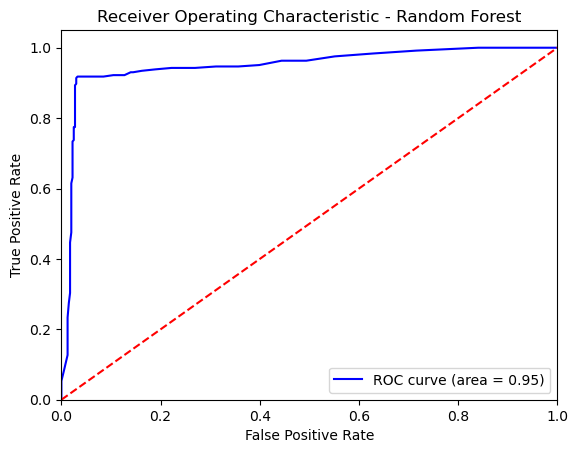

In [32]:
# ROC Curve and AUC
fprate, tprate, thresholds = roc_curve(y_testing_set, y_probs)
ROCAUC = auc(fprate, tprate)

# Plot ROC curve
plt.figure()
plt.plot(fprate, tprate, color='blue', label='ROC curve (area = %0.2f)' % ROCAUC)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()

### Random Forest Result Summary

These cross-validation results indicate that RF model has achieved high accuracy with low variability across the folds:
- Mean Accuracy: The mean accuracy of 0.951 (or 95.1%) suggests that the model is correctly classifying a very high percentage of instances on average across the different folds.  
- Standard Deviation: The standard deviation of 0.009 (or 0.9%) is very low, indicating that the model's performance is quite consistent across different subsets of the data. This low variance suggests that the model generalizes well and isn’t overly reliant on any particular subset.

#### Interpretation
- High Accuracy: A mean accuracy of 95.1% is very strong and indicates that the model is well-trained on the dataset.
- Stability: The low standard deviation demonstrates stable performance, which implies that the model’s performance is not sensitive to variations in the data.

With regard to classification model evaluation metrics results, the model’s performance metrics show a high level of accuracy and balanced classification performance across both classes. 

1. Overall Accuracy: 0.93
   - An accuracy of 93% means the model correctly classified 93% of all cases, which aligns well with the cross-validation results.
2. Classification Report Analysis
   - Precision: Measures the accuracy of positive predictions.
     - Class 0 (Non-Alzheimer’s): 0.93 — Of all instances predicted as `0`, 93% were correctly classified.
     - Class 1 (Alzheimer’s): 0.95 — For all predictions of `1`, 95% were correct.
   - Recall: Measures how well the model identifies all positive instances.
     - Class 0: 0.97 — The model correctly identified 97% of actual `0` cases.
     - Class 1: 0.87 — The model correctly identified 87% of actual `1` cases, showing a slight drop in recall for Alzheimer’s cases.
   - F1-Score: The harmonic mean of precision and recall, balancing the two.
     - Class 0: 0.95
     - Class 1**: 0.91   
3. Confusion Matrix
   - True Negatives (390): Non-Alzheimer cases correctly predicted as `0`.
   - False Positives (11): Non-Alzheimer cases incorrectly predicted as `1`.
   - False Negatives (31): Alzheimer’s cases missed, predicted as `0`.
   - True Positives (213): Correct predictions for Alzheimer’s.
Interpretation
- Balanced Performance**: Both classes have high precision and recall, with only a slight drop in recall for Alzheimer’s cases. This means the model is very effective at identifying both classes, although it misses a few more Alzheimer’s cases than Non-Alzheimer cases.
- Minor Recall Drop in Class 1: The recall for Alzheimer’s (87%) is slightly lower, which might suggest the model is slightly conservative when identifying positive cases.

#### Recommendations for Milestone -4:
- I will try to Optimize Recall for Alzheimer’s Cases since it's important to capture more Alzheimer’s cases, I will adjust the classification threshold to favor class `1` predictions, to see potentially reducing false negatives.
- I tried to address the moderate class imbaalance by setting `class_weight='balanced'` parameter, However for the result I should further work on Class Weight Adjustment: Since class `1` is particularly critical for this project, I will try further tuning (using class weights or resampling) to help balance precision and recall for that class.

Overall, `Random Froest model` performed well, with strong, balanced metrics across both classes compared with `logistic` and `SVM` models. This performance suggests it's well-suited for use on this dataset.


# Final Milestone modification
---
*  Student Name: Abraham Abate
*  Instructor: Brett Werner
*  DSC550: Data Mining
*  Data Science Dept., BU
*  Date: 11/17/2024

---

Compare the results with `XGBoost` and use `GridSearch` to optimize the model. Finally, perform a feature importance analysis to identify the most influential features in the model's predictions.

### 4. XGBoost (Extreme Gradient Boosting)

In [29]:
# Import the necessary library
from xgboost import XGBClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {xgb_accuracy:.2f}')

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
confMatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

# Create a DataFrame from the confusion matrix.
confMatrix_df = pd.DataFrame(
    confMatrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

confMatrix_df

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430

Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,271,6
Actual 1,16,137


### 5. Selecting Best Models from Multiple Learning Algorithms

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and classifier
pipe = Pipeline([
    ("classifier", LogisticRegression(solver='liblinear', max_iter=200))  
])

# Create dictionary with candidate models and their hyperparameters
search_space = [{
                    'classifier': [LogisticRegression(solver='liblinear', max_iter=200)],
                    'classifier__penalty': ['l1', 'l2'],
                    'classifier__C': np.logspace(0, 4, 10)},
                {
                    'classifier': [RandomForestClassifier()],
                    'classifier__n_estimators': [10, 100, 1000],
                    'classifier__max_features': [1, 2, 3]},
                {
                    'classifier': [XGBClassifier(eval_metric='logloss', random_state=42)],
                    'classifier__n_estimators': [50, 100],
                    'classifier__max_depth': [3, 5, 7],
                    'classifier__learning_rate': [0.01, 0.1]
                }]

# Create grid search
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=1)

# Fit grid search
best_model = gridsearch.fit(X_train, y_train)

# View best model
best_classifier = best_model.best_estimator_.get_params()['classifier']
print(f"Best Model: {best_classifier}")

Fitting 5 folds for each of 41 candidates, totalling 205 fits
Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


In [35]:
# Make predictions
y_pred = best_model.predict(X_test)

# Calculate accuracy
best_model_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {best_model_accuracy:.2f}')

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
confMatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

# Create a DataFrame from the confusion matrix.
confMatrix_df = pd.DataFrame(
    confMatrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

confMatrix_df

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       277
           1       0.95      0.92      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430

Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,270,7
Actual 1,13,140


## Rank the Importance of Features

In [30]:
# Calculate feature importance from the Random Forest model.
importances = xgb_model.feature_importances_
importances

array([0.01415564, 0.01620246, 0.01781917, 0.01610666, 0.01444018,
       0.01824201, 0.02243444, 0.        , 0.        , 0.03493673,
       0.        , 0.02308444, 0.01709024, 0.01862642, 0.01903385,
       0.01944298, 0.0194526 , 0.01109734, 0.13021718, 0.14132415,
       0.11120895, 0.07366635, 0.12668192, 0.01568592, 0.        ,
       0.        , 0.        , 0.        , 0.01848246, 0.01788374,
       0.        , 0.0231284 , 0.        , 0.        , 0.0122172 ,
       0.01931084, 0.02802767, 0.        , 0.        , 0.        ],
      dtype=float32)

In [31]:
# Sort the features by their importance.
sorted_df = sorted(zip(xgb_model.feature_importances_, X.columns), reverse=True)
sorted_df

[(0.14132415, 'FunctionalAssessment'),
 (0.13021718, 'MMSE'),
 (0.12668192, 'ADL'),
 (0.11120895, 'MemoryComplaints'),
 (0.07366635, 'BehavioralProblems'),
 (0.034936734, 'Depression'),
 (0.028027674, 'EducationLevel_3'),
 (0.023128403, 'Ethnicity_1'),
 (0.023084436, 'Hypertension'),
 (0.022434438, 'FamilyHistoryAlzheimers'),
 (0.019452598, 'CholesterolHDL'),
 (0.019442985, 'CholesterolLDL'),
 (0.019310838, 'EducationLevel_2'),
 (0.019033853, 'CholesterolTotal'),
 (0.01862642, 'DiastolicBP'),
 (0.01848246, 'Age_Normalized'),
 (0.018242005, 'SleepQuality'),
 (0.017883737, 'CognitiveFunctionalScore'),
 (0.017819166, 'AlcoholConsumption'),
 (0.017090244, 'SystolicBP'),
 (0.016202463, 'Smoking'),
 (0.01610666, 'PhysicalActivity'),
 (0.01568592, 'Confusion'),
 (0.014440183, 'DietQuality'),
 (0.014155637, 'BMI'),
 (0.012217199, 'EducationLevel_1'),
 (0.011097344, 'CholesterolTriglycerides'),
 (0.0, 'PersonalityChanges'),
 (0.0, 'HeadInjury'),
 (0.0, 'Gender_1'),
 (0.0, 'Forgetfulness'),
 (0.

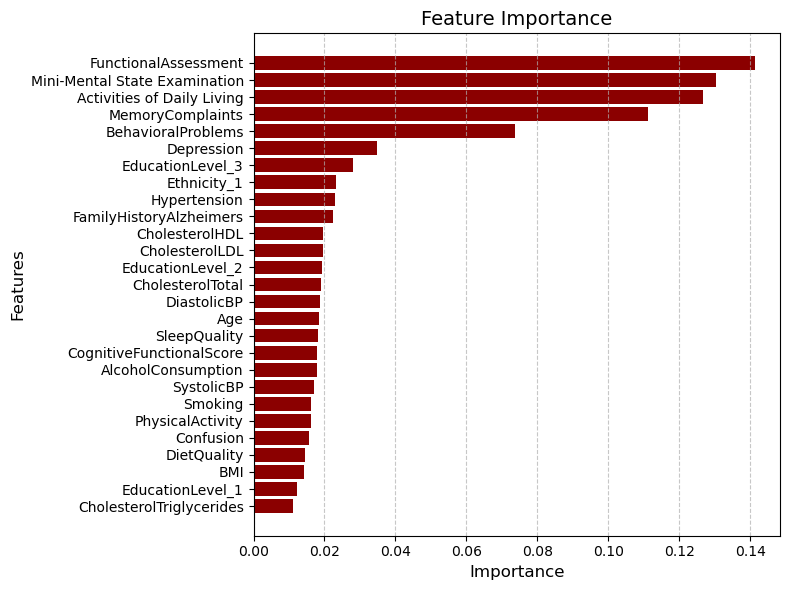

In [37]:
# Updated feature importance data
feature_importances_updated = [
    (0.14132415, 'FunctionalAssessment'),
    (0.13021718, 'Mini-Mental State Examination'),
    (0.12668192, 'Activities of Daily Living'),
    (0.11120895, 'MemoryComplaints'),
    (0.07366635, 'BehavioralProblems'),
    (0.034936734, 'Depression'),
    (0.028027674, 'EducationLevel_3'),
    (0.023128403, 'Ethnicity_1'),
    (0.023084436, 'Hypertension'),
    (0.022434438, 'FamilyHistoryAlzheimers'),
    (0.019452598, 'CholesterolHDL'),
    (0.019442985, 'CholesterolLDL'),
    (0.019310838, 'EducationLevel_2'),
    (0.019033853, 'CholesterolTotal'),
    (0.01862642, 'DiastolicBP'),
    (0.01848246, 'Age'),
    (0.018242005, 'SleepQuality'),
    (0.017883737, 'CognitiveFunctionalScore'),
    (0.017819166, 'AlcoholConsumption'),
    (0.017090244, 'SystolicBP'),
    (0.016202463, 'Smoking'),
    (0.01610666, 'PhysicalActivity'),
    (0.01568592, 'Confusion'),
    (0.014440183, 'DietQuality'),
    (0.014155637, 'BMI'),
    (0.012217199, 'EducationLevel_1'),
    (0.011097344, 'CholesterolTriglycerides')
]

# Unpack feature names and values
importance_values, feature_names = zip(*feature_importances_updated)

# Create horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importance_values, color='darkred')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance', fontsize=14)
# Invert y-axis to show the most important feature at the top
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()